In [8]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import math
import re


# Visualizaciones
# -----------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Para modelos NLP
# -----------------------------------------------------------------------
import spacy
from nltk.corpus import stopwords
import nltk
import contractions
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, classification_report

import sys
sys.path.append('../src')
import soporte_modelos as sm



from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix


# Configuración de pandas
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None)
    

# Otros
# -----------------------------------------------------------------------
from collections import Counter

In [ ]:
df = pd.read_csv('datos/sentiment2.csv', index_col=0)

In [ ]:
df.head()

,statement,status
7839,I am suicidal. i want to die and i want to giv...,Suicidal
46091,I have bipolar and will begin a post-doctoral ...,Bipolar
48497,This might help you The Serenity Prayer is on...,Stress
21799,I fucked up and I need help apologizing to som...,Depression
4790,Sonia Natasha Mirzayanti :),Normal


In [ ]:
df.isna().sum()

statement    12
status        0
dtype: int64

In [ ]:
df.dropna(subset='statement', inplace=True)

In [ ]:
df['status'].value_counts()

status
Depression              297
Normal                  272
Suicidal                201
Anxiety                  78
Stress                   61
Bipolar                  59
Personality disorder     20
Name: count, dtype: int64

In [ ]:
df['statement'][0:1].str.strip()

7839    I am suicidal. i want to die and i want to giv...
Name: statement, dtype: object

In [ ]:
df['statement'].str.strip()

7839     I am suicidal. i want to die and i want to giv...
46091    I have bipolar and will begin a post-doctoral ...
48497    This might help you  The Serenity Prayer is on...
21799    I fucked up and I need help apologizing to som...
4790                           Sonia Natasha Mirzayanti :)
                               ...                        
50005    Disability through the VA. Hey guys, I live in...
42085                             is grouchy and want bmar
52750    Tingling in side/back of head Has anyone had h...
11498    I just do not belong to this world, never did....
4578               It's just fun to watch the story, huhuu
Name: statement, Length: 988, dtype: object

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) # m

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nlp = spacy.load('en_core_web_sm')

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
# ahora lo hacemos para toda la columna
def limpiar_columna(text):
    text = contractions.fix(text)  # Convierte "don't" -> "do not"
        
    # Limpieza de texto
    text = text.lower()  # Convertir a minúsculas
    text = re.sub(r'[^\w\s]', '', text)  # Eliminar puntuación
    text = re.sub(r'\d+', '', text)  # Eliminar números
    text = re.sub(r'\s+', ' ', text)  # Reemplazar múltiples espacios o saltos de línea por un espacio
    text = text.strip()  # Quitar espacios en blanco al inicio y al final
    doc = nlp(text)  # Tokenizar con spaCy


    # eliminamos las stop words
    tokens = [token.lemma_ for token in doc if token.text not in stop_words]
    return tokens

df["texto_limpio"] = df["statement"].apply(limpiar_columna)
df.head()

In [ ]:
import re
import spacy
import contractions

# Cargar el modelo de SpaCy fuera de la función para mejorar el rendimiento
nlp = spacy.load('en_core_web_sm')

def limpiar_texto(texto, stopwords):

    # Expande contracciones
    texto = contractions.fix(texto)
    # Convierte a minúsculas
    texto = texto.lower()
    # Elimina signos de puntuación
    texto = re.sub(r'[.,]', '', texto)
    # Elimina números
    texto = re.sub(r'\d+', '', texto)
    # Elimina caracteres especiales
    texto = re.sub(r'[^\w\s]', '', texto)
    # Elimina espacios dobles y saltos de línea
    texto = re.sub(r'\s+', ' ', texto)
    # Quita espacios al inicio y al final
    texto = texto.strip()

    # Procesa el texto con SpaCy
    doc = nlp(texto)

    # Lematiza y elimina stopwords
    tokens = [token.lemma_ for token in doc if token.text not in stopwords]
    return tokens

# Verificar la existencia de la columna 'statement' antes de aplicar
if 'statement' in df.columns:
    # Crear la nueva columna con los datos limpios
    stop_words = set(spacy.lang.en.stop_words.STOP_WORDS)
    df['texto_limpio'] = df['statement'].apply(lambda x: limpiar_texto(x, stop_words))

# Mostrar las primeras filas
df.head()


OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(texto)

In [ ]:
# def limpiar_y_crear_columna_sin_emojis(dataframe, columna_origen, columna_nueva):

def limpiar_texto(texto, stopwords=stop_words):
    text = contractions.fix(texto)
    texto = texto.lower()
    texto = re.sub(r'[.,]', '', texto)
    texto = re.sub(r'\d+', '', texto)
    texto = re.sub(r'[^\w\s]', '', texto)
    texto = re.sub(r'\s+', ' ', texto)
    texto = texto.strip()
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(texto)

    tokens = [token.lemma_ for token in doc if token.text not in stop_words]
    return tokens

# Crear la nueva columna con los datos limpios
df['texto_limpio'] = df['statement'].apply(limpiar_texto)
df.head()

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
limpiar_y_crear_columna_sin_emojis(df, 'statement', 'state_limpio')

,statement,status,state_limpio
7839,I am suicidal. i want to die and i want to giv...,Suicidal,i am suicidal i want to die and i want to give...
46091,I have bipolar and will begin a post-doctoral ...,Bipolar,i have bipolar and will begin a postdoctoral f...
48497,This might help you The Serenity Prayer is on...,Stress,this might help you the serenity prayer is one...
21799,I fucked up and I need help apologizing to som...,Depression,i fucked up and i need help apologizing to som...
4790,Sonia Natasha Mirzayanti :),Normal,sonia natasha mirzayanti
...,...,...,...
50005,"Disability through the VA. Hey guys, I live in...",Bipolar,disability through the va hey guys i live in t...
42085,is grouchy and want bmar,Normal,is grouchy and want bmar
52750,Tingling in side/back of head Has anyone had h...,Anxiety,tingling in sideback of head has anyone had he...
11498,"I just do not belong to this world, never did....",Suicidal,i just do not belong to this world never did t...


In [ ]:
contractions.fix(text) # corrige todo, palabras como don´t
# meter a la funcion
type(text)#esto es la fila de mi columna

In [ ]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)
doc #me genera un objeto tokenizado

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) # meter a la funcion

In [ ]:
palabras_def = []
for palabra in doc:
    if palabra not in stop_words:
        palabras_def.append(palabra)

In [ ]:
counter(df['texto_limpio'])

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

In [3]:
df = pd.read_csv('datos/datos_modelo.csv', index_col=0)

In [4]:
df.drop(columns=['texto_limpio', 'texto_limpio2', 'statement'], inplace=True)

In [5]:
df["status"] = df["status"].map({
    'Normal': 1, 
    'Depression': 2, 
    'Bipolar': 3, 
    'Suicidal': 4,
    'Personality disorder': 5, 
    'Anxiety': 6, 
    'Stress': 7
})

In [5]:
df.head()

,status,pca_componente_0,pca_componente_1,pca_componente_2,pca_componente_3,pca_componente_4,pca_componente_5,pca_componente_6,pca_componente_7,pca_componente_8,pca_componente_9,pca_componente_10,pca_componente_11,pca_componente_12,pca_componente_13,pca_componente_14,pca_componente_15,pca_componente_16,pca_componente_17,pca_componente_18,pca_componente_19,pca_componente_20,pca_componente_21,pca_componente_22,pca_componente_23,pca_componente_24,pca_componente_25,pca_componente_26,pca_componente_27,pca_componente_28,pca_componente_29,pca_componente_30,pca_componente_31,pca_componente_32,pca_componente_33,pca_componente_34,pca_componente_35,pca_componente_36,pca_componente_37,pca_componente_38,pca_componente_39,pca_componente_40,pca_componente_41,pca_componente_42,pca_componente_43,pca_componente_44,pca_componente_45,pca_componente_46,pca_componente_47,pca_componente_48,pca_componente_49
0,Normal,-4.166958,1.085342,-1.256300,-0.654952,0.229818,-0.209711,-0.111332,-0.204373,-0.008520,-0.267589,0.449050,0.234548,-1.234130,-0.087692,-1.269780,0.490356,0.892334,0.893362,0.964271,-0.653305,-0.146066,-0.509052,-0.486949,0.648771,-1.218510,-0.563942,-0.304280,-0.207373,-0.308383,-0.102235,0.309188,-0.159663,-0.562120,-0.106919,-0.162292,-0.010425,-0.524035,-0.375448,-0.310312,-0.077423,-0.575376,-0.522221,0.413891,0.145406,-0.867870,0.241776,0.423456,0.043598,0.289901,-0.465889
1,Normal,-3.130317,0.233026,-0.731019,-1.017554,-0.095339,-0.988184,0.471093,0.078369,0.098768,0.513655,0.974481,-0.222206,0.372747,-0.178887,1.469327,-0.159931,-0.405331,0.020586,-0.149109,0.168575,0.456951,-0.781137,0.349398,0.306666,-1.015102,-0.521269,0.505107,0.114535,-0.657741,0.127704,-0.508418,0.103796,0.257568,-0.385744,0.100914,0.062089,-0.826991,-0.164009,0.262378,0.335845,0.376375,0.115571,0.143910,-0.310767,0.364440,-0.014454,-0.121969,-0.072742,0.204577,0.097934
2,Depression,0.960539,1.485548,0.674313,-0.274514,0.346411,-1.630196,-0.324532,-0.135597,0.722724,0.193689,-1.429291,-0.642233,-0.677986,-0.048958,-0.052794,0.694619,-0.612574,-0.251449,0.128420,-0.272787,-0.467453,-0.606318,0.578573,0.995051,0.051875,-0.448418,-0.627448,0.257375,0.567625,-0.191948,-0.602714,-0.010456,0.147597,0.294968,0.617242,-0.020136,-0.558713,-0.004819,-0.637813,-0.790043,-0.027983,-0.554739,-0.762780,-0.575639,-0.374673,-0.841310,0.008016,-0.174659,0.233555,0.740557
3,Bipolar,0.782020,-1.261072,-0.168272,0.154593,-1.359454,-0.327133,0.254076,0.195572,0.339859,0.319723,0.088959,-0.321905,-0.531748,-1.117942,0.347647,0.415937,-0.169612,0.127175,-0.644484,-0.727773,-0.234314,-0.764611,0.115834,0.119488,-0.419704,0.154260,-0.135768,-0.776419,0.601348,-0.447252,-0.413402,-0.205019,0.151222,0.013781,0.061705,0.167748,0.252850,-0.258309,-0.350144,0.494210,-0.174398,0.039461,-0.209083,-0.698643,-0.278673,0.165547,-0.082804,-0.036487,0.278819,-0.001199
4,Depression,3.840794,0.632939,-1.412047,0.682446,1.928237,1.447088,0.002770,-0.507700,-0.270777,-0.191621,-0.162204,0.468096,0.076440,0.106540,0.129049,-0.311800,0.146829,0.589105,0.060267,0.050721,-0.104647,-0.015059,0.286532,0.325217,-0.173164,-0.151246,-0.446511,0.133692,0.299613,-0.012375,-0.327389,0.218861,0.109673,0.134396,-0.001855,0.162311,-0.181650,0.033692,0.072075,0.114648,0.221906,-0.072024,-0.199091,0.026009,0.053323,-0.139195,0.242942,-0.000844,0.231804,0.049207


In [7]:
x = df.iloc[:,4:]
y = df['status']

In [12]:
x

,pca_componente_0,pca_componente_1,pca_componente_2,pca_componente_3,pca_componente_4,pca_componente_5,pca_componente_6,pca_componente_7,pca_componente_8,pca_componente_9,pca_componente_10,pca_componente_11,pca_componente_12,pca_componente_13,pca_componente_14,pca_componente_15,pca_componente_16,pca_componente_17,pca_componente_18,pca_componente_19,pca_componente_20,pca_componente_21,pca_componente_22,pca_componente_23,pca_componente_24,pca_componente_25,pca_componente_26,pca_componente_27,pca_componente_28,pca_componente_29,pca_componente_30,pca_componente_31,pca_componente_32,pca_componente_33,pca_componente_34,pca_componente_35,pca_componente_36,pca_componente_37,pca_componente_38,pca_componente_39,pca_componente_40,pca_componente_41,pca_componente_42,pca_componente_43,pca_componente_44,pca_componente_45,pca_componente_46,pca_componente_47,pca_componente_48,pca_componente_49
0,-4.166958,1.085342,-1.256300,-0.654952,0.229818,-0.209711,-0.111332,-0.204373,-0.008520,-0.267589,0.449050,0.234548,-1.234130,-0.087692,-1.269780,0.490356,0.892334,0.893362,0.964271,-0.653305,-0.146066,-0.509052,-0.486949,0.648771,-1.218510,-0.563942,-0.304280,-0.207373,-0.308383,-0.102235,0.309188,-0.159663,-0.562120,-0.106919,-0.162292,-0.010425,-0.524035,-0.375448,-0.310312,-0.077423,-0.575376,-0.522221,0.413891,0.145406,-0.867870,0.241776,0.423456,0.043598,0.289901,-0.465889
1,-3.130317,0.233026,-0.731019,-1.017554,-0.095339,-0.988184,0.471093,0.078369,0.098768,0.513655,0.974481,-0.222206,0.372747,-0.178887,1.469327,-0.159931,-0.405331,0.020586,-0.149109,0.168575,0.456951,-0.781137,0.349398,0.306666,-1.015102,-0.521269,0.505107,0.114535,-0.657741,0.127704,-0.508418,0.103796,0.257568,-0.385744,0.100914,0.062089,-0.826991,-0.164009,0.262378,0.335845,0.376375,0.115571,0.143910,-0.310767,0.364440,-0.014454,-0.121969,-0.072742,0.204577,0.097934
2,0.960539,1.485548,0.674313,-0.274514,0.346411,-1.630196,-0.324532,-0.135597,0.722724,0.193689,-1.429291,-0.642233,-0.677986,-0.048958,-0.052794,0.694619,-0.612574,-0.251449,0.128420,-0.272787,-0.467453,-0.606318,0.578573,0.995051,0.051875,-0.448418,-0.627448,0.257375,0.567625,-0.191948,-0.602714,-0.010456,0.147597,0.294968,0.617242,-0.020136,-0.558713,-0.004819,-0.637813,-0.790043,-0.027983,-0.554739,-0.762780,-0.575639,-0.374673,-0.841310,0.008016,-0.174659,0.233555,0.740557
3,0.782020,-1.261072,-0.168272,0.154593,-1.359454,-0.327133,0.254076,0.195572,0.339859,0.319723,0.088959,-0.321905,-0.531748,-1.117942,0.347647,0.415937,-0.169612,0.127175,-0.644484,-0.727773,-0.234314,-0.764611,0.115834,0.119488,-0.419704,0.154260,-0.135768,-0.776419,0.601348,-0.447252,-0.413402,-0.205019,0.151222,0.013781,0.061705,0.167748,0.252850,-0.258309,-0.350144,0.494210,-0.174398,0.039461,-0.209083,-0.698643,-0.278673,0.165547,-0.082804,-0.036487,0.278819,-0.001199
4,3.840794,0.632939,-1.412047,0.682446,1.928237,1.447088,0.002770,-0.507700,-0.270777,-0.191621,-0.162204,0.468096,0.076440,0.106540,0.129049,-0.311800,0.146829,0.589105,0.060267,0.050721,-0.104647,-0.015059,0.286532,0.325217,-0.173164,-0.151246,-0.446511,0.133692,0.299613,-0.012375,-0.327389,0.218861,0.109673,0.134396,-0.001855,0.162311,-0.181650,0.033692,0.072075,0.114648,0.221906,-0.072024,-0.199091,0.026009,0.053323,-0.139195,0.242942,-0.000844,0.231804,0.049207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,-0.323321,-2.034011,0.512891,-0.887874,-0.099619,0.015212,1.084512,0.621677,0.476983,-0.413832,-0.120795,0.501141,-0.861538,-0.663035,0.009578,-0.673521,-0.169700,0.707126,0.246723,0.304970,-0.209505,0.284089,0.162529,0.111084,-0.179894,0.689013,0.218393,0.245007,0.209133,0.419112,0.100938,-0.168968,0.385418,-0.322247,-0.245255,0.039208,-0.330359,0.173463,-0.233202,0.096050,-0.485185,-0.007951,0.271882,0.076206,0.285202,-0.181592,-0.238931,0.464823,-0.193704,-0.446128
984,1.890583,-1.031056,-0.720859,0.

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [12]:
params_arbol = {
    'max_depth': [4, 7,10,14],
    'min_samples_split': [10, 50, 100, 200],
    'min_samples_leaf': [10, 15, 20, 30],
    'max_leaf_nodes': [6, 8, 10, 20, 30]
}

In [13]:
grid_search_arbol = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol.fit(x_train, y_train)

ValueError: 
All the 1600 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
320 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\tree\_classes.py", line 1377, in fit
    super()._fit(
  File "C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\tree\_classes.py", line 318, in _fit
    y = np.ascontiguousarray(y, dtype=DOUBLE)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Normal'

--------------------------------------------------------------------------------
1280 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\tree\_classes.py", line 1377, in fit
    super()._fit(
  File "C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\tree\_classes.py", line 318, in _fit
    y = np.ascontiguousarray(y, dtype=DOUBLE)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Suicidal'


In [ ]:
modelo_final_arbol = grid_search_arbol.best_estimator_

In [ ]:
modelo_final_arbol

In [ ]:
y_test_pred_final = modelo_final_arbol.predict(x_test)
y_train_pred_final = modelo_final_arbol.predict(x_train)

In [ ]:
df_metricas_arbol = metricas(y_train, y_train_pred_final, y_test, y_test_pred_final)

In [ ]:
df_metricas_arbol

In [30]:
df['status'].value_counts()

Series([], Name: count, dtype: int64)

In [9]:
logistica = sm.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = 'status')

In [10]:
params_grid_tree = {
                'max_depth': [9,10,12,15],
                'min_samples_split': [4,5,6],
                'min_samples_leaf': [1, 2, 4]
}

In [12]:
logistica.ajustar_modelo("tree") # aqui le paso los parametros que yo quiera usarles

# llamamos al metodo para obtener los resultaods de las predicciones
df_dectree = logistica.calcular_metricas(modelo_nombre =  "tree", get_auc=False)
df_dectree.head().T

Fitting 5 folds for each of 36 candidates, totalling 180 fits
El mejor modelo es DecisionTreeClassifier(max_depth=5, random_state=42)


,train,test
accuracy,0.653165,0.530303
precision,0.694466,0.459520
recall,0.653165,0.530303
f1,0.620532,0.475634
kappa,0.530014,0.360070
auc,NaN,NaN
time_seconds,0.003445,0.003445
n_jobs,8.000000,8.000000


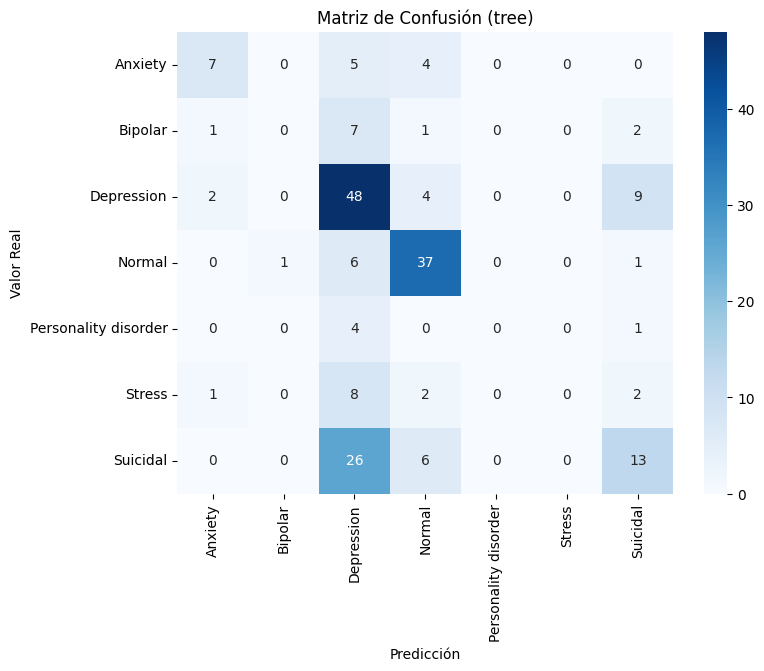

In [13]:
logistica.plot_matriz_confusion('tree')

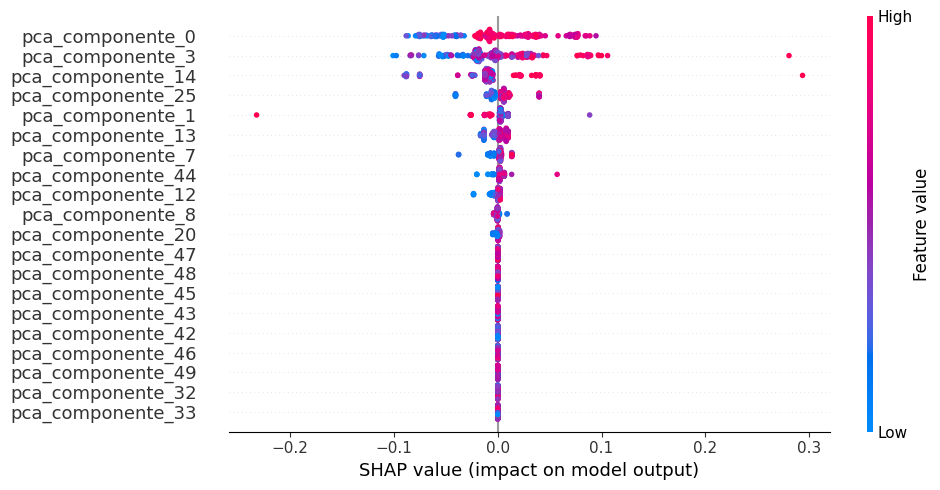

In [14]:
logistica.plot_shap_summary('tree')